In [1]:
import requests
from config import token, url
import os.path as osp

# Criando professores

Este item supõe que você já tem acesso ao token do admin definido na migração de criação do BD ou que já tem um `token` de professor.

In [6]:
r = requests.post(f'{url}/users/', data={'token': token, 'lms_user': 'igorsm1', 'is_prof': True})
r.status_code, r.content

(200, b'{"message":"ok","token":"c9e3ee5f-769e-4143-95fc-74d3936009f6"}')

# Criando alunos

Rode o mesmo código acima, mas use `is_prof=False`. 

# Criando cursos

In [8]:
r = requests.post(f'{url}/courses/', data={'token': token, 'name': 'Sistemas Hardware-Software'})
r.status_code, r.content

(200, b'{"message":"Course created","id":1}')

Com um curso criado já é possível enviar submissões de atividades. Se a atividade correspondente não existir ela é criada na primeira submissão. Para os Quiz, a resposta correta é a primeira resposta dada por um professor. Se não houve o endpoint retorna a resposta como string vazia. 

# Enviando submissões

Atualmente são suportadas dois tipos de submissões: Quizzes e Código.

## Submissões do tipo Quiz

In [9]:
r = requests.post(f'{url}/courses/1/activities/1', data={'token': token, 'content': 'blkl', 'type': 'multiple_choice'})
r.status_code, r.content

(200, b'{"message":"OK","id":11}')

## Submissões do tipo Código


# Relatórios

A seção a seguir deve ser usada para obter relatórios de uma certa atividade executada pelos alunos. 

In [5]:
course_id = 1
activity_id = "ex1"

## Listar todas as submissões de uma atividade

In [6]:
r = requests.get(f'{url}/courses/{course_id}/activities/{activity_id}', data={'token': token})

In [7]:
# Campo livre para fazer análises
import pandas as pd

respostas = pd.json_normalize(r.json())
respostas
print(r.json())

[{'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'A', 'lms_user': 'igorsm1'}, {'content': 'A', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'B', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'A', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'B', 'lms_user': 'igorsm1'}, {'content': 'D', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'C', 'lms_user': 'igorsm1'}, {'content': 'B', 'lms_user': 'igorsm1'}, {'content': 'A', 'lms_user': 'igorsm1'}]


## Histograma das respostas para um quiz

<AxesSubplot:>

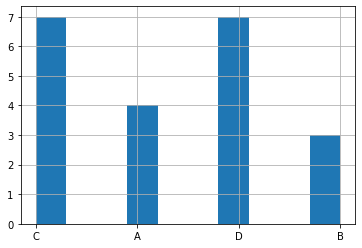

In [8]:
respostas["content"].hist()

In [9]:
respostas

,content,lms_user
0,C,igorsm1
1,A,igorsm1
2,A,igorsm1
3,D,igorsm1
4,B,igorsm1
5,C,igorsm1
6,C,igorsm1
7,A,igorsm1
8,D,igorsm1
9,D,igorsm1
